In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats


sns.set(style="darkgrid", color_codes=True)


# ECS7024 Statistics for Artificial Intelligence and Data Science

## Coursework 3

This notebook will look at property price data across the UK. It will use two datasets fot its analysis. They include a dataset with information on average property prices per region and per area across the UK and a dataset with information on which region each area belongs to. 

The average property price data looks at the average prices of flats, detached,	semi-detached,	terraced houses over the period of 36 months (3 years), from September 2016 to September 2019.

As each of the areas in the dataset belongs to a region there is some crossover in the data and therefore before analysis the area data and the region data must be seperated. To do this, a second location code dataset can be used which includes the region codes for each area. This will be used to assign each area a column with it's correct region.

This notebook will specifically aim to:
* Identify annual trends in flat, and detatched house prices per region.
* Identify overall trends in flat, and detatched house prices per region.
* Compare trends accross both property types and regions.


* See the change in the price of flats between July 2017 and July 2018 for each area.
* Analyse these changes per region


* Perform a chi-square analysis to determine whether the change in the price of flats its corresponding region.

**Table of Contents**

 1. Section 1: Load and Prepare The Data
     1. Property Data Sets
     1. Seperate Region and Area Data
     1. Labelling The Area Data With Their Regions
     1. Check For Null Values
     1. Timestamp Data
 
&NewLine;
 
 2. Section 2: Trends in Flats and Detached Property Types
     1. Flat and Detached Property Types Over 36 Months
     1. Annual Trends
     1. Comparing Property Types
 
&NewLine; 
 
 3. Section 3: Flat Price Changes Between July 2017 and July 2018
     1. Appropriate Data Frame
     1. Flat Price Change Across The UK
     1. Flat Price Change Per Region
     1. Comparing Flat Price Change Between Regions
 
&NewLine; 
 
 4. Section 3: Statistical Analysis
     1. The Hypotheses
     1. Data Preperation
     1. Chi-Square Analysis
     1. Conclusion

## Section 1 - Load and Prepare The Data
### Section 1. A. Property Data Sets 



Firstly the data is loaded into two data frames Avg_Prop_Price (average property price data) and Location_Code (location code data). These data frames can be viewed below.

In [2]:
Avg_Prop_Price = pd.read_csv('average-property-price.csv')
Location_Code = pd.read_csv('location-codes.csv')

In [3]:
Avg_Prop_Price

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


In [4]:
Location_Code

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


### Section 1. B. Seperate Region and Area Data

The average property price data must be seperated to avoid overlap of data as mentioned at the beginning of thr document. This is done by identifying the first 3 charaters of each value in the 'Code' column. If the first 3 characters are E12 this signifies that that row corresponds to region data and that row will be added to a new data frame 'Region_Data'. If the first 3 characters are not E12 this signifies that that row corresponds to area data and that row will be added to a new data frame 'Area_Data'.

Both data frames can be viewed below.

In [5]:
Region_Data = Avg_Prop_Price.loc[Avg_Prop_Price['Code'].str[0:3] == 'E12']
Region_Data

,Date,Area,Code,Detached,Semi,Terraced,Flat
5436,01/09/2016,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
5437,01/10/2016,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
5438,01/11/2016,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
5439,01/12/2016,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
5440,01/01/2017,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


In [6]:
Area_Data = Avg_Prop_Price.loc[Avg_Prop_Price['Code'].str[0:3] != 'E12']
Area_Data

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5431,01/04/2019,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830
5432,01/05/2019,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010
5433,01/06/2019,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920
5434,01/07/2019,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220


### Section 1. C. Labelling The Area Data With Their Regions

The analysis of the area data will require the region data for each area, therefore region data must be added to the Area_Data data frame. To do this a dictionary is created using the Location_Code data frame, mapping each area code to a region. This dictionary is then applied to the 'Code' column of the Area_Data data frame. A copy of the Area_Data data frame is made (Area_Data_WReg) and a new column 'Region' is added to Area_Data_WReg with the corresponding region for the area code of each row.

In [7]:
Reg_dict = pd.Series(Location_Code.RegionName.values,index=Location_Code.AuthorityCode).to_dict()

In [8]:
def apply_reg_dict(row):
    if row.Code in Reg_dict:
        return Reg_dict[row.Code]
    return row.Code

Area_Data_WReg = Area_Data.assign(Region = Area_Data.apply(apply_reg_dict, axis=1))

To ensure that this has been done succesfully, the unique values of the 'RegionName' column in the Location_Code data frame, and the unique values of the 'Region' column in the Area_Data_WReg data frame are taken. If these values match (e.g do not include any NaN values or unexpeted values such as a code) then the dictionary has been applied succesfully to each row.

In [9]:
Area_Data_WReg.loc[:, 'Region'].unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'East of England',
       'South East', 'London'], dtype=object)

In [10]:
Location_Code.RegionName.unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'East of England',
       'South East', 'London'], dtype=object)

The unique values match therefore the has been applied succesfully to each row and each row now has a valid 'Region' value.

### Section 1. D. Check For Null Values

Before beginning the analysis it important to check for any null values in the data. Displayed below is a count of the null values for each attribute in both the Region_Data and Area_Data data frames.


In [11]:
Region_Data = Region_Data.replace('?',np.NaN)

print('Number of instances = %d' % (Region_Data.shape[0]))
print('Number of attributes = %d' % (Region_Data.shape[1]))

print('Number of missing values:')
for col in Region_Data.columns:
    print('\t%s: %d' % (col,Region_Data[col].isna().sum()))

Number of instances = 324
Number of attributes = 7
Number of missing values:
	Date: 0
	Area: 0
	Code: 0
	Detached: 0
	Semi: 0
	Terraced: 0
	Flat: 0


In [12]:
Area_Data_WReg = Area_Data_WReg.replace('?',np.NaN)

print('Number of instances = %d' % (Area_Data_WReg.shape[0]))
print('Number of attributes = %d' % (Area_Data_WReg.shape[1]))

print('Number of missing values:')
for col in Area_Data_WReg.columns:
    print('\t%s: %d' % (col,Area_Data_WReg[col].isna().sum()))

Number of instances = 5436
Number of attributes = 8
Number of missing values:
	Date: 0
	Area: 0
	Code: 0
	Detached: 36
	Semi: 36
	Terraced: 20
	Flat: 0
	Region: 0


There is no missing data in the Region_Data data frame. There are however, missing values in the Area_Data data frame. There are 36 missing values in both the 'Detached' and 'Semi' columns and there are 20 missing values in the 'Terraced' column. Below the rows including null values are displayed.

In [13]:
Area_Data_WReg.loc[(Area_Data_WReg.Detached.isnull()) | (Area_Data_WReg.Semi.isnull()) | (Area_Data_WReg.Terraced.isnull())]

,Date,Area,Code,Detached,Semi,Terraced,Flat,Region
3276,01/09/2016,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,London
3277,01/10/2016,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,London
3278,01/11/2016,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,London
3279,01/12/2016,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,London
3280,01/01/2017,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,London
3281,01/02/2017,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,London
3282,01/03/2017,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,London
3283,01/04/2017,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,London
3284,01/05/2017,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,London
3285,01/06/2017,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,London


These null values are expected as 'City of London' is a very central part of London, therefore the null values for detached and semi is likely because there arent any in this area. As for terraced, the reason for getting null values after 2017, could be due to terraced houses being converted to flats.

As the analysis of this notebook will not be looking at detached, semi, or terraced property types in the area data, there is no need to approximate a values for these cells or remove these rows.

### Section 1. E. Timestamp Data

As this data and the following analysis relates to periods of time it important to change the 'Date' columns of the Area and Region data frames into 'Time' so that it can be plotted as such. To do this, for each data frame a new column is created named 'Month' where the date has been reformatted to read as year-month-day (20xx-xx-xx)

In [14]:
Region_Data = Region_Data.assign(Month = pd.to_datetime(Region_Data['Date'], dayfirst=True)).drop(labels='Date', axis=1)
Area_Data_WReg = Area_Data_WReg.assign(Month = pd.to_datetime(Area_Data_WReg['Date'], dayfirst=True)).drop(labels='Date', axis=1)


Then a function (makeTime) is created to transfrom these dates into a timestamp. This function is then applied to the 'Month' column of each data frame and assigned to a new column 'Time'. The 'Month' column is then dropped. These data frames are displayed below.

In [15]:
def makeTime(row):
    return pd.Timestamp(row.Month)

Region_Data = Region_Data.assign(Time = Region_Data.apply(makeTime, axis=1))
Region_Data = Region_Data.drop(labels = ['Month'], axis=1)
Region_Data

,Area,Code,Detached,Semi,Terraced,Flat,Time
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [16]:
Area_Data_WReg = Area_Data_WReg.assign(Time = Area_Data_WReg.apply(makeTime, axis=1))
Area_Data_WReg = Area_Data_WReg.drop(labels = ['Month'], axis=1)
Area_Data_WReg

,Area,Code,Detached,Semi,Terraced,Flat,Region,Time
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,North East,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,North East,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,North East,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,North East,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,North East,2017-01-01
...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,West Midlands,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,West Midlands,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,West Midlands,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,West Midlands,2019-07-01


## Section 2 - Trends in Flats and Detached Property Types

This part will analyse trends in the prices of detached and flat property types in the Region data. Specifically it will look at:

* The regional trends for both property types over 3 years.
* The annual trends for both property types over 3 years.
* The comparative trends of both property type.

Before plotting, the data is sorted by 'Time' and 'Code'. The 'Time' column is made into the index and then each region is sorted into its own individual dataframe.

In [17]:
Region_Data_Sorted = Region_Data.sort_values(by = ['Time', 'Code'])
Region_Data_Sorted = Region_Data_Sorted.set_index(keys='Time')
Region_Data_Sorted

,Area,Code,Detached,Semi,Terraced,Flat
Time,,,,,,
2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.6886,89361.51412
2016-09-01,North West,E12000002,258657.9184,158034.4748,114895.4436,111773.30410
2016-09-01,Yorkshire and The Humber,E12000003,241975.9618,148613.3140,119687.6395,108879.02460
2016-09-01,East Midlands,E12000004,253192.5738,158410.6007,131160.2422,105719.76580
2016-09-01,West Midlands Region,E12000005,293131.3321,172332.5497,140912.5248,117955.44680
...,...,...,...,...,...,...
2019-08-01,West Midlands Region,E12000005,332309.9097,195327.2501,159143.5034,128207.56240
2019-08-01,East of England,E12000006,445761.2287,299826.4883,246599.5746,191576.78820
2019-08-01,London,E12000007,908197.0329,579593.0472,503279.3244,408728.12370


In [18]:
North_E = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000001']
North_W = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000002']
Y_and_H = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000003']
East_M = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000004']
West_M = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000005']
East_Eng = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000006']
London = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000007']
South_E = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000008']
South_W = Region_Data_Sorted.loc[Region_Data_Sorted['Code'] == 'E12000009']

Each data frame is an abreviated name of the region:

North_E = North East = E12000001

North_W = North West = E12000002

Y_and_H = Yorkshire and The Humber = E12000003

East_M = East Midlands = E12000004

West_M = West Midlands= E12000005

East_Eng = East England = E12000006

London = London = E12000007

South_E = South East = E12000008

South_W = South West = E12000009

### Section 2. A. Flat and Detached Property Types Over 36 Months

Now the 'Flat' price data and the 'Detached' price data over 36 months from each region can be plotted onto a figure for flats by region and detached by region respectively.

These plots are shown below.

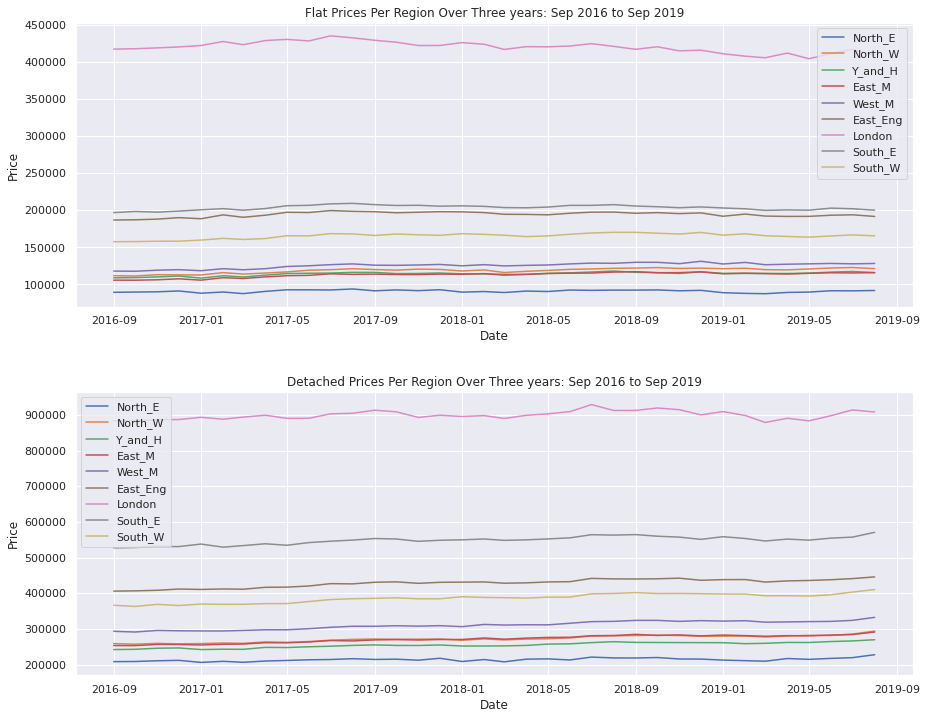

In [19]:
fig, (a1, a2) = plt.subplots(2, 1, figsize=(15, 12))
fig.subplots_adjust(hspace = 0.3)
a1.set_title('Flat Prices Per Region Over Three years: Sep 2016 to Sep 2019')
a1.plot(North_E.loc[:,'Flat'], label = 'North_E')
a1.plot(North_W.loc[:,'Flat'], label = 'North_W')
a1.plot(Y_and_H.loc[:,'Flat'], label = 'Y_and_H')
a1.plot(East_M.loc[:,'Flat'], label = 'East_M')
a1.plot(West_M.loc[:,'Flat'], label = 'West_M')
a1.plot(East_Eng.loc[:,'Flat'], label = 'East_Eng')
a1.plot(London.loc[:,'Flat'], label = 'London')
a1.plot(South_E.loc[:,'Flat'], label = 'South_E')
a1.plot(South_W.loc[:,'Flat'], label = 'South_W')
a1.set_ylabel('Price')
a1.set_xlabel('Date')
a1.legend()

a2.set_title('Detached Prices Per Region Over Three years: Sep 2016 to Sep 2019')
a2.plot(North_E.loc[:,'Detached'], label = 'North_E')
a2.plot(North_W.loc[:,'Detached'], label = 'North_W')
a2.plot(Y_and_H.loc[:,'Detached'], label = 'Y_and_H')
a2.plot(East_M.loc[:,'Detached'], label = 'East_M')
a2.plot(West_M.loc[:,'Detached'], label = 'West_M')
a2.plot(East_Eng.loc[:,'Detached'], label = 'East_Eng')
a2.plot(London.loc[:,'Detached'], label = 'London')
a2.plot(South_E.loc[:,'Detached'], label = 'South_E')
a2.plot(South_W.loc[:,'Detached'], label = 'South_W')
a2.set_ylabel('Price')
a2.set_xlabel('Date')
a2.legend()




These plots show the price difference in properties across the regions with London as the most expensive and the North East as the cheapest.

From these two plots it is difficult to see the trends as the pricing of each regiona are so spaced out. Therefore this data will be replotted on 3 seperate plots, one for London alone, another for the middle values (East England, South East, and South West) and another for the lower values (North East, North West, Yorkshire and the Humber, East Midlands, and West Midlands).

Below are the first three plots relating to flat prices.

Note: The price range of each plot is set to 60000 to ensure the plots are directly comparable.

(400000.0, 460000.0)

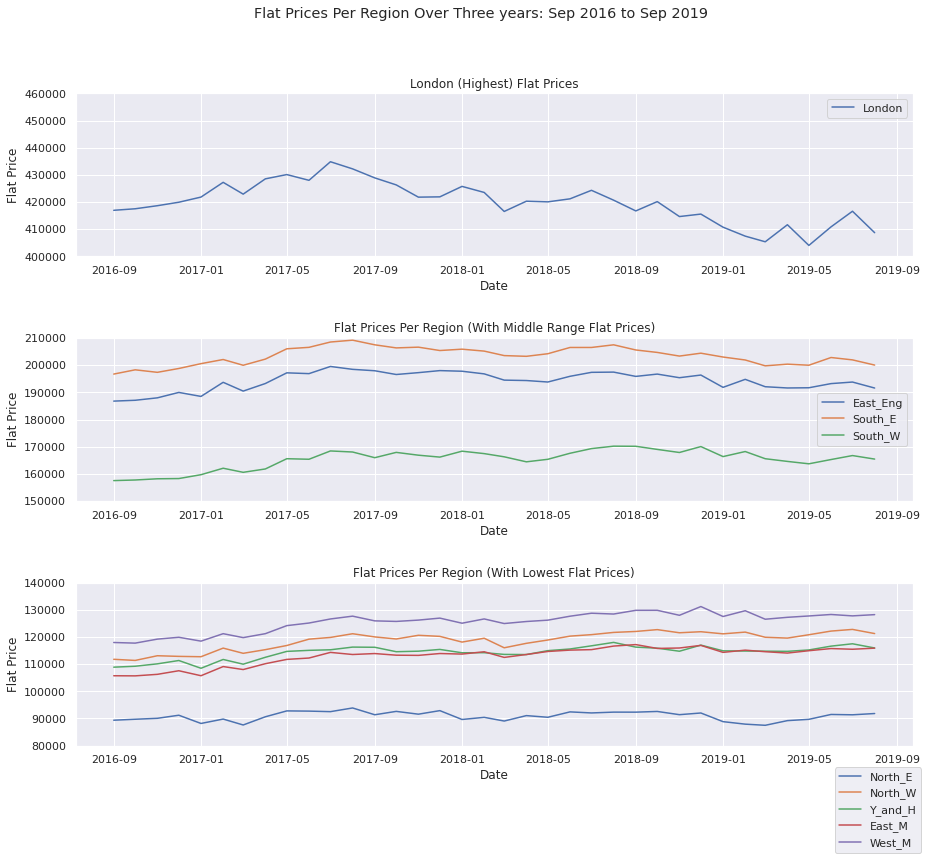

In [20]:
fig, (b1, b2, b3) = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Flat Prices Per Region Over Three years: Sep 2016 to Sep 2019')
fig.subplots_adjust(hspace = 0.5)
b1.set_title('London (Highest) Flat Prices')
b2.set_title('Flat Prices Per Region (With Middle Range Flat Prices)')
b3.set_title('Flat Prices Per Region (With Lowest Flat Prices)')
b3.plot(North_E.loc[:,'Flat'], label = 'North_E')
b3.plot(North_W.loc[:,'Flat'], label = 'North_W')
b3.plot(Y_and_H.loc[:,'Flat'], label = 'Y_and_H')
b3.plot(East_M.loc[:,'Flat'], label = 'East_M')
b3.plot(West_M.loc[:,'Flat'], label = 'West_M')
b2.plot(East_Eng.loc[:,'Flat'], label = 'East_Eng')
b1.plot(London.loc[:,'Flat'], label = 'London')
b2.plot(South_E.loc[:,'Flat'], label = 'South_E')
b2.plot(South_W.loc[:,'Flat'], label = 'South_W')
b1.set_ylabel('Flat Price')
b2.set_ylabel('Flat Price')
b3.set_ylabel('Flat Price')
b1.set_xlabel('Date')
b2.set_xlabel('Date')
b3.set_xlabel('Date')
b1.legend()
b2.legend()
b3.legend(loc='upper left', bbox_to_anchor=(0.9, -0.1),
           ncol=1)
b3.set_ylim(80000, 140000)
b2.set_ylim(150000, 210000)
b1.set_ylim(400000, 460000)



From these plots one can see that:

* Overall, the flat price in London has decreased over the 3 year period.
* The prices across the rest of the country are higher at the end of the 3 year period than they were at the beginning.
* For the regions with midrange flat prices, while the overall change over three years is an increase, at around July 2017 the flat prices tend to stagnate and then dip.
* For all of the regions with the lowest flat prices except for the North East region, prices tend to increase throughout, however, the increase seems to lessen towards the end of the 3 year period.
* While the price of flats in the North East region is higher at the end of the 3 year period than it is at the beginning, the trend seems to be that the prices are stagnant with no big gains or losses over the 3 year period.
* It is fair to assume that property prices fluctuate depending on demand, therefore it seems as though the demand for flats across London during this period has decreased resulting in the lowering of flat prices. This could be due to the Brexit vote discouraging investment in properties in London.
* There are periodic annual dips in price across all of the data over the 36 months. These will be discussed in more detail further on.
* There is an annomily where prices for all flats seem to decrease around the date August 2017. This could be due to the Grenfell disaster which happened in July 2017.

Below are the 3 plots relating to the price of detached properties.

Note: The price range of each plot is set to 250000 to ensure the plots are directly comparable.

(800000.0, 950000.0)

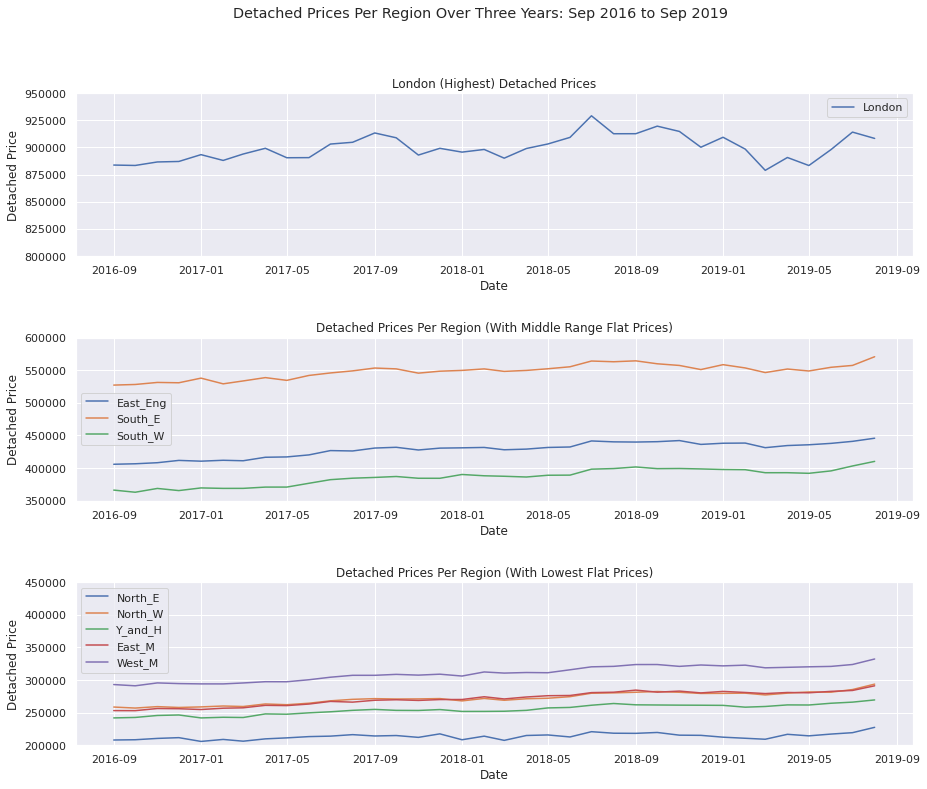

In [21]:
fig, (b1, b2, b3) = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Detached Prices Per Region Over Three Years: Sep 2016 to Sep 2019')
fig.subplots_adjust(hspace = 0.5)
b1.set_title('London (Highest) Detached Prices')
b2.set_title('Detached Prices Per Region (With Middle Range Flat Prices)')
b3.set_title('Detached Prices Per Region (With Lowest Flat Prices)')
b3.plot(North_E.loc[:,'Detached'], label = 'North_E')
b3.plot(North_W.loc[:,'Detached'], label = 'North_W')
b3.plot(Y_and_H.loc[:,'Detached'], label = 'Y_and_H')
b3.plot(East_M.loc[:,'Detached'], label = 'East_M')
b3.plot(West_M.loc[:,'Detached'], label = 'West_M')
b2.plot(East_Eng.loc[:,'Detached'], label = 'East_Eng')
b1.plot(London.loc[:,'Detached'], label = 'London')
b2.plot(South_E.loc[:,'Detached'], label = 'South_E')
b2.plot(South_W.loc[:,'Detached'], label = 'South_W')
b1.set_ylabel('Detached Price')
b2.set_ylabel('Detached Price')
b3.set_ylabel('Detached Price')
b1.set_xlabel('Date')
b2.set_xlabel('Date')
b3.set_xlabel('Date')
b1.legend()
b2.legend()
b3.legend()
b3.set_ylim(200000, 450000)
b2.set_ylim(350000, 600000)
b1.set_ylim(800000, 950000)

From these plots one can see that:

* Overall, the detached prices across the country have increased over the 3 year period.
* In every region other than London the prices tend to increase gradually throughout.
* Detached prices in London however, seem to be much more volatile and unpredictable.

### Section 2. B. Annual Trends

To see annual trends, an average of both flat and detached properties has been taken across all regions. Each average has then been plotted over the space of 3 years (36 months). The first plot shows the average price of a flat over 3 years and the second shows the average price of a detached property over 3 years.

Text(0.5, 1.0, 'UK Average Detached Price Over 3 Years: Sep 2016 to Sep 2019')

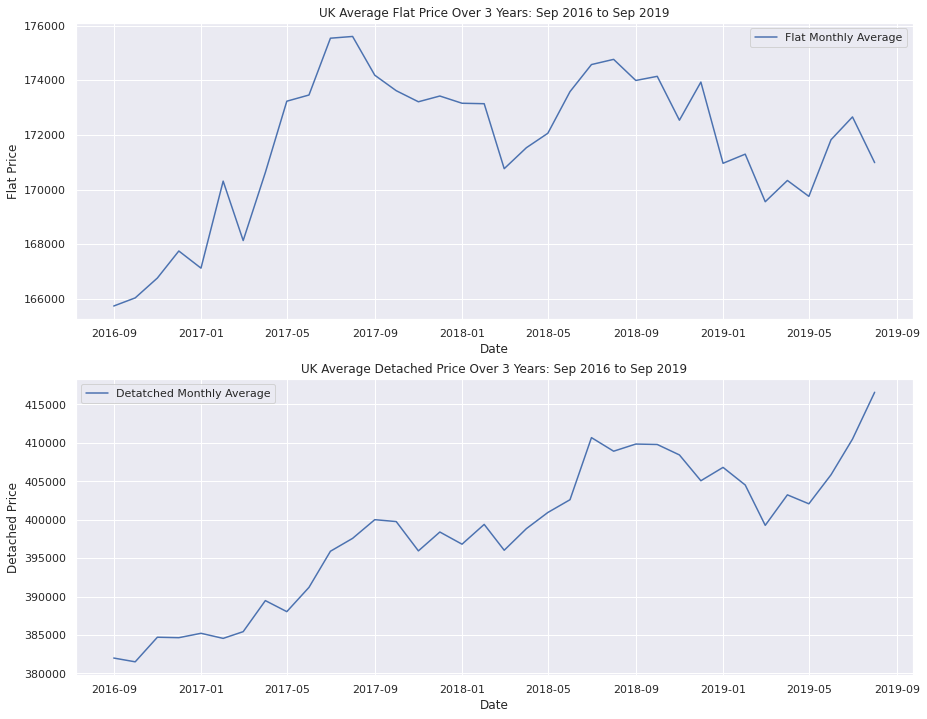

In [22]:
bmonthly = pd.DataFrame(data = {
      'flat_avg' : Region_Data_Sorted.loc[:,'Flat'].resample('1MS').mean(),
      'detached_avg' : Region_Data_Sorted.loc[:,'Detached'].resample('1MS').mean()})

fig, (a1, a2) = plt.subplots(2, 1, figsize=(15, 12))
a1.plot(bmonthly.loc[: ,'flat_avg'], label= 'Flat Monthly Average')
a2.plot(bmonthly.loc[: ,'detached_avg'], label = 'Detatched Monthly Average')
a1.legend()
a2.legend()
a1.set_ylabel('Flat Price')
a2.set_ylabel('Detached Price')
a1.set_xlabel('Date')
a2.set_xlabel('Date')
a1.set_title('UK Average Flat Price Over 3 Years: Sep 2016 to Sep 2019')
a2.set_title('UK Average Detached Price Over 3 Years: Sep 2016 to Sep 2019')

* Both plots demonstrate annual trends where during the winter months (October - March) prices either dip or become stagnant, while between March and September prices tend to rise.

* With our earlier assumption suggesting that property prices fluctuate with demand, this suggests that there is less demand during the winter months. This may be as people prefer to move house during the summer months, possibly because of the weather, possibly because of the lack of festive activites such as Christmas

* These plots show the overall trends of flat prices and detached prices. In both it is clear that between September 2016 and September 2019 the prices of both property types has gone up.

* The detached price trend goes up consistently when annual trends are taken into account, while the flat price tend seems to be far more volatile and even decreasing after July 2017.

* These plots can easily be misinterprated as the price of both properties seem to have gone up a similar amount over the space of three years, however, the range in the y axis for each are different. A direct comparison can be made in section 2. C.

### Section 2. C. Comparing Property Types

To compare the trends of the two property types, the average monthly price of Flats and Detached properties are both plotted on the same figure below. The axis for the prices of each of the property types (Flats on the left and Detached on the right) have been plotted to show the same range (40000) so that the plots are directly comparable in terms of actual money as well as trends.

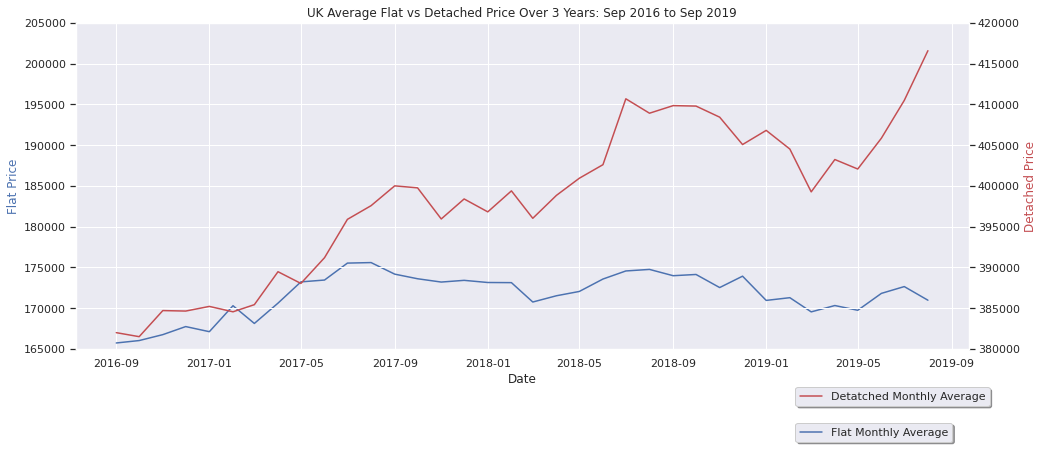

In [23]:
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(bmonthly.loc[:,'flat_avg'], color='b',  label='Flat Monthly Average')
a2 = a1.twinx()  
a2.plot(bmonthly.loc[:,'detached_avg'], color='r', label = 'Detatched Monthly Average')



a1.set_title('UK Average Flat vs Detached Price Over 3 Years: Sep 2016 to Sep 2019')
a1.set_ylabel('Flat Price', color='b')
a2.set_ylabel('Detached Price', color='r')
a1.set_xlabel('Date')


a1.set_ylim(165000, 205000)
a2.set_ylim(380000, 420000)

a2.legend(loc='upper left', bbox_to_anchor=(0.8, -0.1),
          fancybox=True, shadow=True, ncol=5)
a1.legend(loc='upper left', bbox_to_anchor=(0.8, -0.21),
          fancybox=True, shadow=True, ncol=5)

* The above plot shows that while initially the prices of flats and deatched properties tended to rise at the same rate, at around July 2017 the flat prices seem to stagnate and even drop over the following few years while detached property prices continue to rise.

* This difference between the two property types may be related to the Grenfell disaster, as since then regulations were put in palce and many flats were not sellable until expensive cladding changes were made.

## Section 3 - Flat Price Changes Between July 2017 and July 2018

This part will use the area data to:
* Look at the difference in the price of flats across all areas between July 2017 and July 2018.
* Look at the difference in the price as a percentage of the average flat price in July 2017.
* Look at the difference in the price as a percentage of the average flat price in July 2017 per region.
* Compare the average difference in the price as a percentage of the average flat price in July 2017 between regions.

### Section 3. A. Appropriate Data Frame

As this part will be looking at a price change in flats for each area across a specific interval, a new data frame (Price_Change) is created. This data frame will have 'Area' as the index and include columns of:

* Average flat prices in July 2017 (Jul_2017) 
* Average flat prices in July 2018 (Jul_2017)
* Region data of each area (Region)
* The difference in prices between Jul_2017 and Jul_2018 (Difference, calculated by subtracting average flat price in Jul 2017 from Jul 2018)
* The price difference as a percentage of average flat price for that are in July 2017 (Difference_as_percent,calculated by dividing the value in the difference column by the value in the Jul_2017 column for each row).

This data frame is then sorted in ascending order by average flat price in July 2017. As they have been sorted in ascending order by average flat price in July 2017, the areas plotted from left to right on the x axis of each of the following plots will look at areas from lowest flat value to highest flat value (left to right).

The data frame can be seen below. 

In [24]:
Jul_2017 = Area_Data_WReg.loc[Area_Data_WReg['Time'] == '2017-07-01']
Jul_2018 = Area_Data_WReg.loc[Area_Data_WReg['Time'] == '2018-07-01']
Price_Change = pd.DataFrame()
Price_Change = Price_Change.assign(Jul_2017 = Jul_2017.loc[:, 'Flat'].values)
Price_Change = Price_Change.assign(Jul_2018 = Jul_2018.loc[:, 'Flat'].values)
Price_Change = Price_Change.assign(Area = Jul_2017.loc[:, 'Area'].values)
Price_Change = Price_Change.assign(Region = Jul_2017.loc[:, 'Region'].values)
Price_Change = Price_Change.assign(Difference = Price_Change.loc[:, 'Jul_2018'] - Price_Change.loc[:, 'Jul_2017'])
Price_Change = Price_Change.assign(Difference_as_percent = 100*(Price_Change.loc[:, 'Difference'] / Price_Change.loc[:, 'Jul_2017']))
Price_Change_Sorted = Price_Change.sort_values(by = ['Jul_2017'])
Price_Change_Sorted = Price_Change_Sorted.set_index(keys='Area')
Price_Change_Sorted

,Jul_2017,Jul_2018,Region,Difference,Difference_as_percent
Area,,,,,
Hartlepool,6.500784e+04,6.111682e+04,North East,-3891.02012,-5.985463
Redcar and Cleveland,6.550781e+04,6.480280e+04,North East,-705.01266,-1.076227
Middlesbrough,6.916307e+04,6.931391e+04,North East,150.83825,0.218091
North East Lincolnshire,6.916482e+04,6.918541e+04,Yorkshire and The Humber,20.59197,0.029772
North Lincolnshire,6.919111e+04,6.899270e+04,Yorkshire and The Humber,-198.40593,-0.286751
...,...,...,...,...,...
Hammersmith and Fulham,6.607945e+05,6.421513e+05,London,-18643.20200,-2.821331
Camden,7.851798e+05,7.555432e+05,London,-29636.59200,-3.774498
City of London,8.524996e+05,8.067272e+05,London,-45772.44100,-5.369204


### Section 3. B. Flat Price Change Across The UK

Now a plot will be created looking at the actual difference of the average flat price (Difference) for each area in the UK.

Text(0.5, 0, 'Areas in order of flat price in July 2017 (Cheapest Left)')

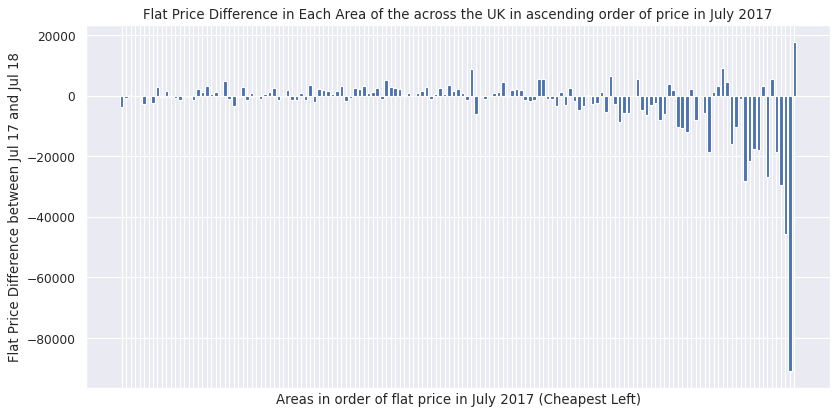

In [25]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(Price_Change_Sorted.index,
        Price_Change_Sorted.Difference, label='Price Difference')
plt.xticks(visible = False)
plt.title('Flat Price Difference in Each Area of the across the UK in ascending order of price in July 2017')
plt.ylabel('Flat Price Difference between Jul 17 and Jul 18')
plt.xlabel('Areas in order of flat price in July 2017 (Cheapest Left)')


The plot above shows that the difference in flat price in the most expensive areas tend to be the biggest differences and those in the least expensive areas tend to be the smallest. This is expected as fluctuation amounts in property price depends on the price of the property, however, as for these to be comparative the changes need to be proportional to the average flat prices.

The next plot shows the same data (price difference) as a percentage of the average flat price in July 2017.

Text(0.5, 0, 'Areas in order of flat price in July 2017 (Cheapest Left)')

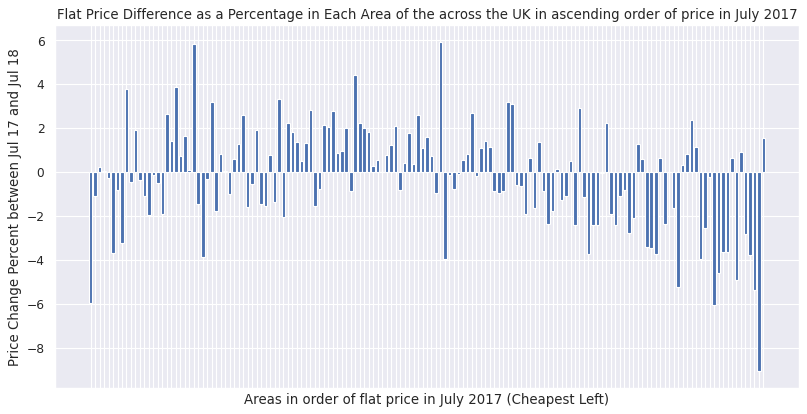

In [26]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(Price_Change_Sorted.index,
        Price_Change_Sorted.Difference_as_percent, label='Price Difference as percent')
plt.xticks(visible = False)
plt.title('Flat Price Difference as a Percentage in Each Area of the across the UK in ascending order of price in July 2017')
plt.ylabel('Price Change Percent between Jul 17 and Jul 18')
plt.xlabel('Areas in order of flat price in July 2017 (Cheapest Left)')

This plot shows that the most expensive areas and some of least most expensive areas see flat prices fall significantly, with areas with flat prices in the middle of the range seeing the biggest rise in flat prices.

### Section 3. C. Flat Price Change Per Region

Now each area is filtered by region, and a bar chart for each region is created with areas along the x axis (cheapest to most expensive, left to right).

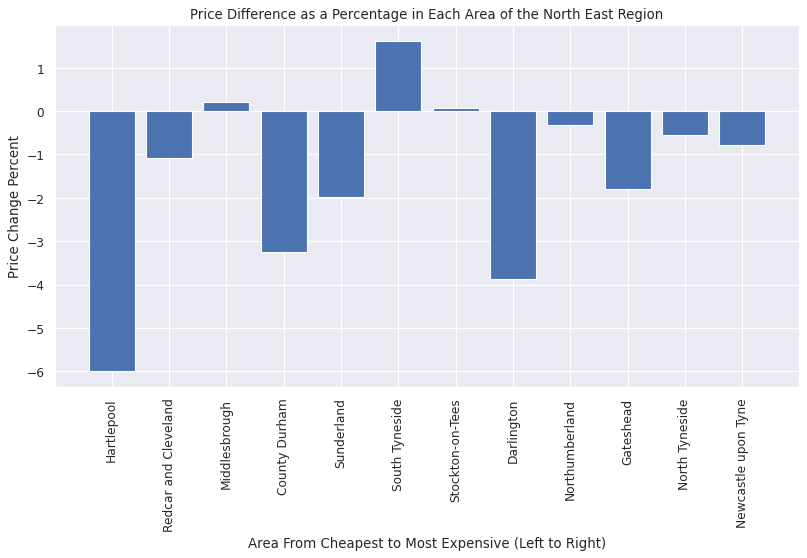

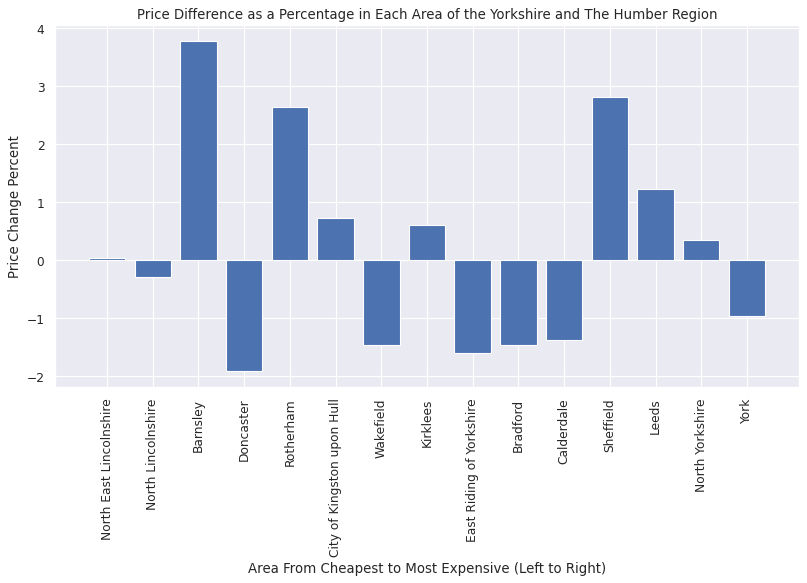

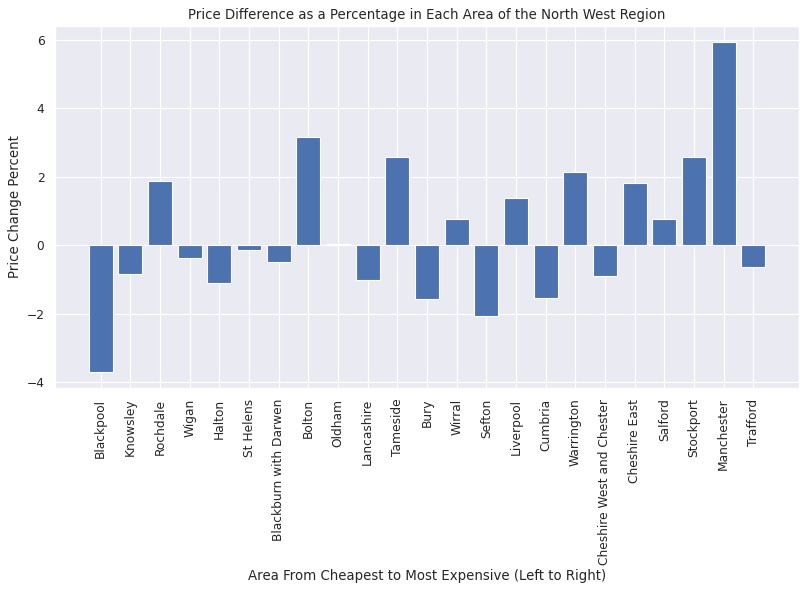

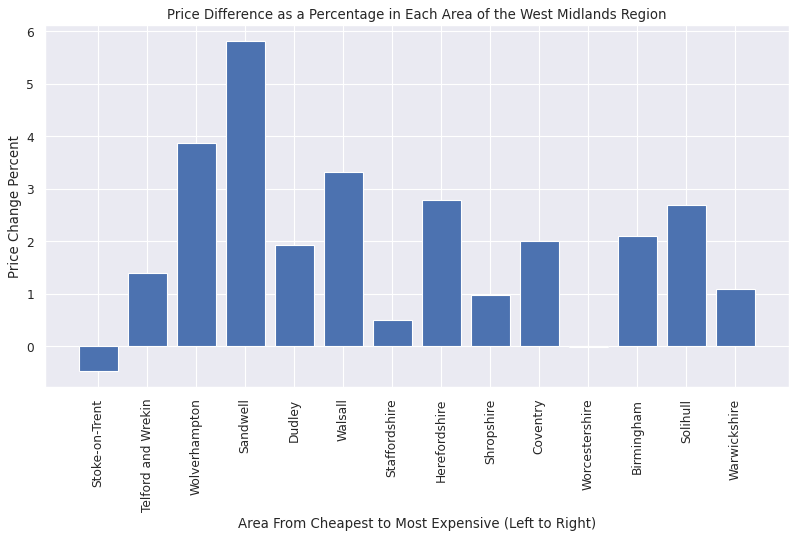

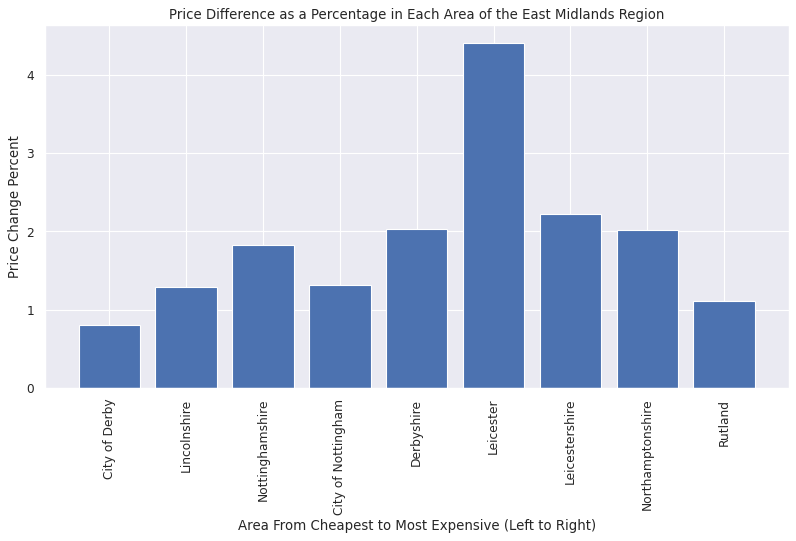

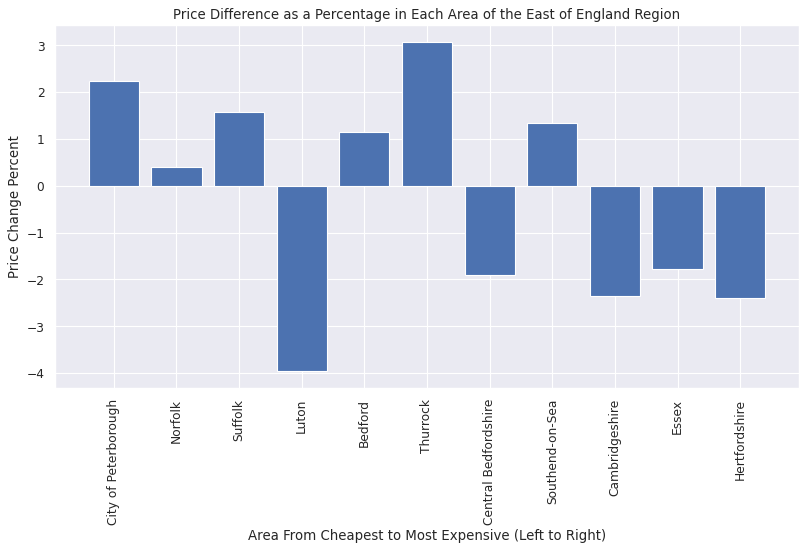

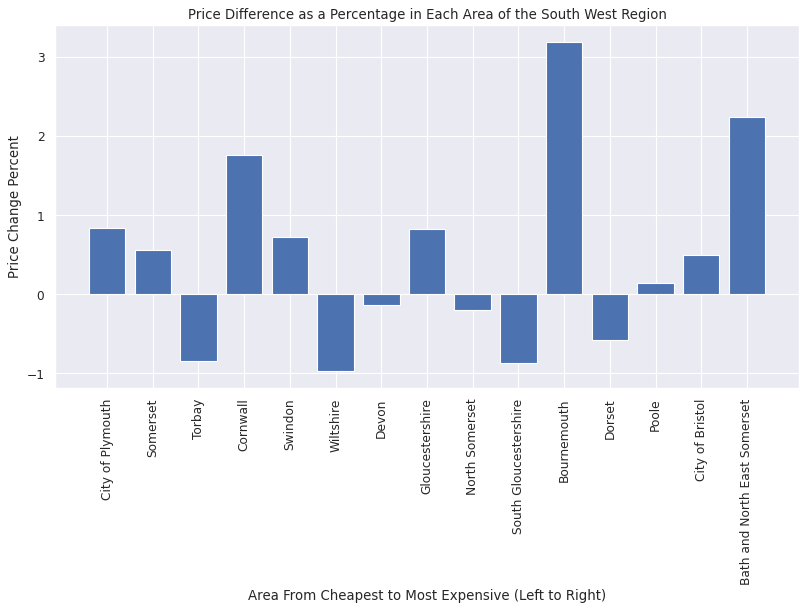

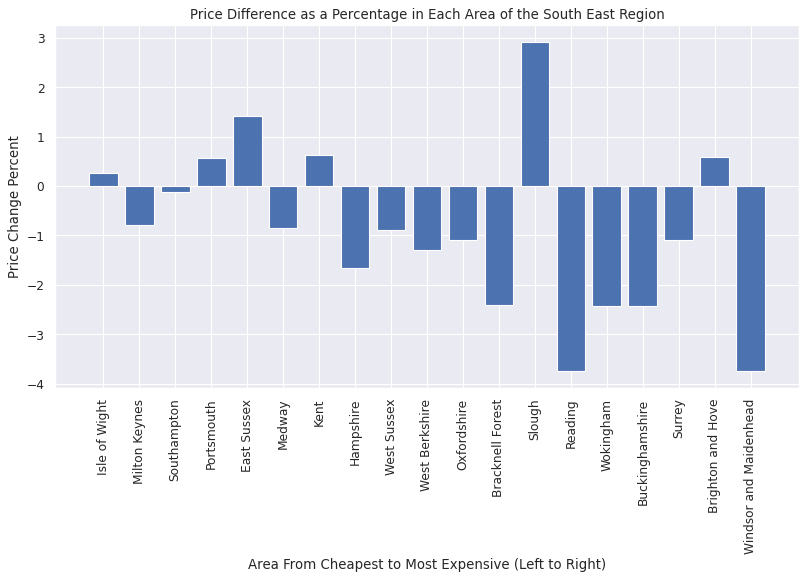

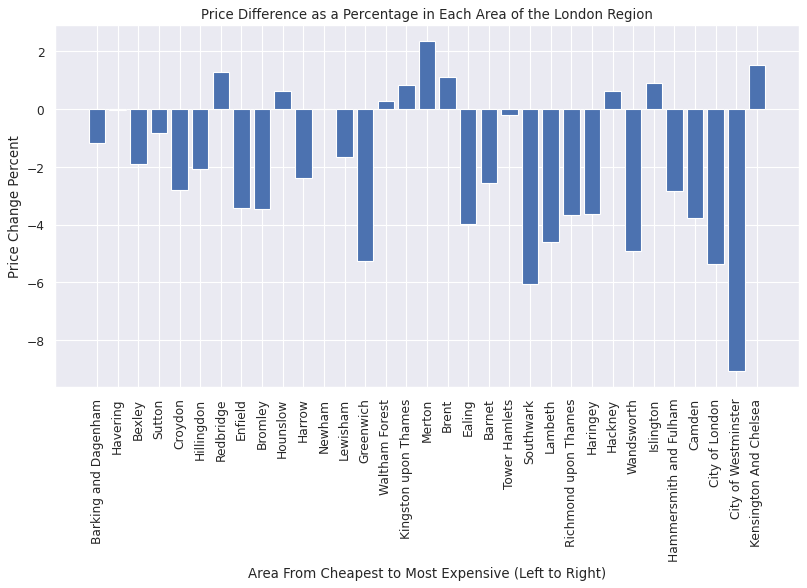

In [27]:

for value in Price_Change_Sorted.loc[:, 'Region'].unique():
    plt.figure(figsize=(12, 6), dpi=80)
    plt.bar(Price_Change_Sorted.loc[Price_Change_Sorted['Region'] == str(value)].index,
            Price_Change_Sorted.loc[Price_Change_Sorted['Region'] == str(value)].Difference_as_percent, label='Price Difference')
    plt.xticks(rotation=90)
    plt.title('Price Difference as a Percentage in Each Area of the ' + value + ' Region')
    plt.ylabel('Price Change Percent')
    plt.xlabel('Area From Cheapest to Most Expensive (Left to Right)')


    

From these bar plots above there are some that particularly stand out:
* Both of the Midlands regions (East Midlands and West Midlands) see an increase in price across almost all areas.

* This suggests that flats in the midlands were in higher demand in July 2018 than in July 2017.

* There were 3 regions where the flat prices fell throughout most of the areas in the region over this period, these regions were London, the South East and the North East.

* This suggests that flats in theses areas were in lower demand in July 2018 than in July 2017.

* Interestingly, in the regions where flats tend to be more expensive (London and the South East), it is the areas with the most expensive flats that saw the biggest comparative loss, however, in the region where the flat prices tend to be lowest (North East), it is areas with the lowest value flats that saw the biggest comparaive loss.

### Section 3. D. Comparing Flat Price Change Between Regions

Below, the average percent difference in flat prices is taken, and these percentages are plotted in a bar chart. It shows that the regions with the biggest average losses in flat value are London and North East (the most expensive and the cheapest regions), while the West Midlands and the East Midlands saw the biggest average gains in flat prices.

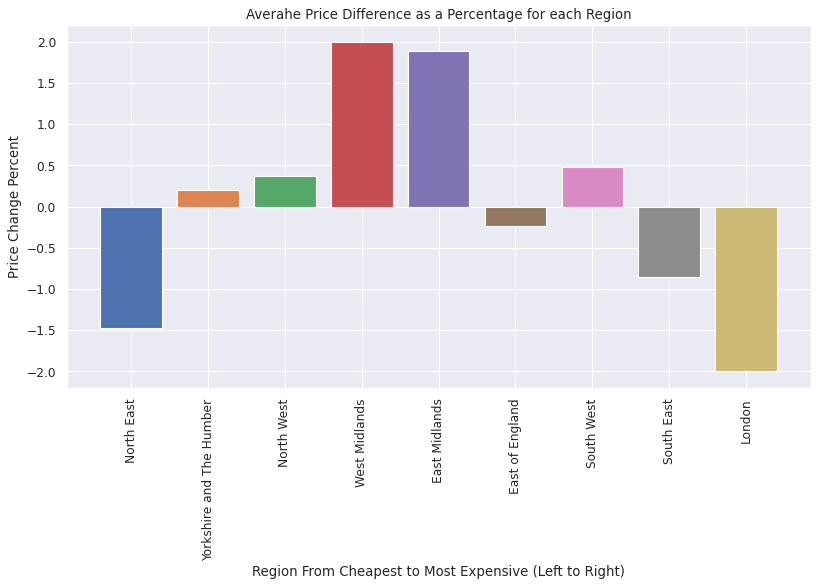

In [28]:
plt.figure(figsize=(12, 6), dpi=80)
for value in Price_Change_Sorted.loc[:, 'Region'].unique():
    Region_df = Price_Change_Sorted.loc[Price_Change_Sorted['Region'] == value]
    plt.bar(Region_df.Region,  Region_df.Difference_as_percent.mean(), label='Price Difference as a Percentage')
    plt.xticks(rotation=90)
    plt.title('Averahe Price Difference as a Percentage for each Region')
    plt.ylabel('Price Change Percent')
    plt.xlabel('Region From Cheapest to Most Expensive (Left to Right)')

# Part 4 - Statistical Analysis

### Section 4. A. The Hypotheses

While part 3 seems to show that there is a price difference in flats depending on the region, to establish whether this difference is significant and has not occured by change, a chi-square analysis can be performed. For this, our hypothesis is:

$H_1$: There is a significant difference in flat prices between regions, and flat prices and regions are correlated.

With a null hypothesis:

$H_0$: There is no significant difference in flat prices between regions, and flat prices and regions are independant.

### Section 4. B. Data Preperation

To do this, first every area must be coded as to whether the value of flats in that area has increased or decreased between the times of July 2017 and July 2018. This is done by defining two functions. The first function establishes whether the price of flats has increased over this period. If the price has increased it will return the value 1, if not it will return 0. The second function establishes whether the price of flats has decreased over this period. If the price has descreased it will return the value 1, if not it will return 0. These functions are then applied to each row and the values are added to new columns named 'Increase' and 'Decrease' respectively.

In [29]:
def Increase(row):
    if (row.Difference > 0) : return 1
    if (row.Difference <= 0) : return 0

def Decrease(row):
    if (row.Difference >= 0) : return 0
    if (row.Difference < 0) : return 1
    
Price_Change_Sorted = Price_Change_Sorted.assign(Increase = Price_Change_Sorted.apply(Increase, axis=1))
Price_Change_Sorted = Price_Change_Sorted.assign(Decrease = Price_Change_Sorted.apply(Decrease, axis=1))
Price_Change_Sorted

,Jul_2017,Jul_2018,Region,Difference,Difference_as_percent,Increase,Decrease
Area,,,,,,,
Hartlepool,6.500784e+04,6.111682e+04,North East,-3891.02012,-5.985463,0,1
Redcar and Cleveland,6.550781e+04,6.480280e+04,North East,-705.01266,-1.076227,0,1
Middlesbrough,6.916307e+04,6.931391e+04,North East,150.83825,0.218091,1,0
North East Lincolnshire,6.916482e+04,6.918541e+04,Yorkshire and The Humber,20.59197,0.029772,1,0
North Lincolnshire,6.919111e+04,6.899270e+04,Yorkshire and The Humber,-198.40593,-0.286751,0,1
...,...,...,...,...,...,...,...
Hammersmith and Fulham,6.607945e+05,6.421513e+05,London,-18643.20200,-2.821331,0,1
Camden,7.851798e+05,7.555432e+05,London,-29636.59200,-3.774498,0,1
City of London,8.524996e+05,8.067272e+05,London,-45772.44100,-5.369204,0,1


Now the 'Increase', 'Decrease', and 'Region' columns are added to a new data frame (change_by_reg). The data is now grouped by region with region becoming the new index and the 'Increase' and 'Decrease' columns containing the increase and decrease data for each area in a region summed respectively.

In [30]:
change_by_reg = Price_Change_Sorted.drop(columns = ['Jul_2017', 'Jul_2018', 'Difference', 'Difference_as_percent'])
change_by_reg = change_by_reg.groupby(by = 'Region').sum()
change_by_reg


,Increase,Decrease
Region,,
East Midlands,9,0
East of England,6,5
London,10,23
North East,3,9
North West,11,12
South East,6,13
South West,9,6
West Midlands,12,2
Yorkshire and The Humber,8,7


### Section 4. C. Chi-Square Analysis

Now the chi-square analysis can be run.

In [31]:
test_stat, p_value, dof, expected = stats.chi2_contingency(change_by_reg, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.056 %


Given the p-value, the null hypothesis can be confidently rejected and the our hypothesis can be accepted.

It can then be concluded that there is a significant difference in flat prices between regions, and flat prices and regions are correlated. 

However, this only shows that flat prices and regions are related it does not show causation. It also does not show which regions have a significant price difference.

### Section 4. D. Conclusion

**Trends**

* Detached prices per region tend to increase over the 3 year period.
* Flat prices per region have different trends depending on the price band of the region.
* London detached and flat prices tend to be more volatile.
* People tend to buy properties more during the summer periods than the winter periods.
* While average detached and flat prices throughout all regions both rose over a 3 year period, detached prices rose significantly more with a more consistent positive trend. Flat prices began with a positive trend however prices stagnated and began to decrease.

**Flat Price Change Between July 2017 and July 2018**

* The areas with the average most expensive and areas with the average least expensive flats lost the most relative value during this period.

* Areas with flats averaging the middle range of the UK gained the most relative value during this period.

* Relative flat values fell across almost all areas for regions with the cheapest and most expensive flats.

* Relative flat values rose across almost all areas for both East Midlands region and West Midlands regions, regions with flats in the middle range of values.

* Changes in flat values across the UK were shown to be related to which region they belonged to, however, through the analysis it was not possible to tell for which regions the change in price was significant.